In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_calc = pd.read_csv('../result-1e6×1e6/calc.csv',sep=' ', index_col=False)

In [3]:
# data_calc.N += 1
data_calc

,N,<x>,<y>,<R>,<x^2>,<y^2>,<Δx^2>,<Δy^2>,<ΔR^2>
0,1,-5.465750e-01,0.935889,1.083800e+00,5.344070e+05,1.625150e+06,5.344060e+05,1.625150e+06,2.159550e+06
1,2,-5.027380e-01,0.750704,9.034950e-01,1.838920e+07,2.619550e+06,1.838920e+07,2.619550e+06,2.100870e+07
2,3,6.500480e-01,-1.518570,1.651850e+00,2.055440e+07,5.647430e+06,2.055440e+07,5.647430e+06,2.620180e+07
3,4,3.561920e+00,1.730920,3.960220e+00,3.506720e+07,1.791440e+07,3.506720e+07,1.791440e+07,5.298160e+07
4,5,4.820210e+00,2.371410,5.371960e+00,3.602130e+07,1.801850e+07,3.602130e+07,1.801850e+07,5.403980e+07
...,...,...,...,...,...,...,...,...,...
2493,997500,-1.088770e+06,114642.000000,1.094790e+06,1.344270e+18,1.132380e+17,1.344270e+18,1.132380e+17,1.457500e+18
2494,998000,-1.088520e+06,114401.000000,1.094520e+06,1.344270e+18,1.132380e+17,1.344270e+18,1.132380e+17,1.457500e+18
2495,998500,-1.088550e+06,114454.000000,1.094550e+06,1.344270e+18,1.132380e+17,1.344270e+18,1.132380e+17,1.457500e+18
2496,999000,-1.089590e+06,114604.000000,1.095600e+06,1.344270e+18,1.132400e+17,1.344270e+18,1.132400e+17,1.457510e+18


## Апроксимация

In [4]:
index_end = 3000
index_start = 0
x = np.log10(data_calc['N'][index_start:index_end])
y = np.log10(data_calc['<ΔR^2>'][index_start:index_end])

In [5]:
lg_mu = (y.mean()*(x**2).mean() - (x*y).mean()*x.mean())/((x**2).mean() - x.mean()**2)
mu = 10**lg_mu
print(f'lg_mu: {lg_mu}, mu: {mu}')

lg_mu: 6.685882285940675, mu: 4851569.821701367


In [6]:
nu = ((x*y).mean() - y.mean()*x.mean())/((x**2).mean() - x.mean()**2)
print(f'nu: {nu}')

nu: 1.8844277118420971


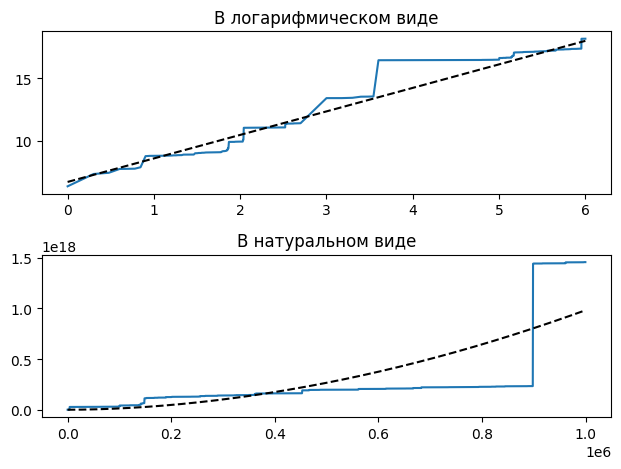

In [7]:
plt.figure()

plt.subplot(2, 1, 1) 

x = np.log10(data_calc['N'][index_start:index_end])
y = np.log10(data_calc['<ΔR^2>'][index_start:index_end])
plt.title('В логарифмическом виде')
plt.plot(x, y)
plt.plot(x, lg_mu + nu * x,'k--', label='Аппроксимация')

plt.subplot(2, 1, 2) 
N_list = data_calc['N'][index_start:index_end]
R2_list = data_calc['<ΔR^2>'][index_start:index_end]
plt.title('В натуральном виде')
plt.plot(N_list, R2_list)
plt.plot(N_list, mu*(N_list**nu),'k--', label='Аппроксимация')

plt.tight_layout() 
plt.show()

In [10]:
data_first_particle = pd.read_csv('../result-1e6×1e6/first_particle.csv',sep=' ', index_col=False)

In [11]:
data_first_particle

,x,y
0,0.00000,-0.092297
1,2.16843,-0.092297
2,-32.21670,-0.092297
3,-32.21670,1.821050
4,-32.21670,3.188580
...,...,...
896488,-948151.00000,-319251.000000
896489,-948151.00000,-319251.000000
896490,-948149.00000,-319251.000000
896491,-948148.00000,-319251.000000


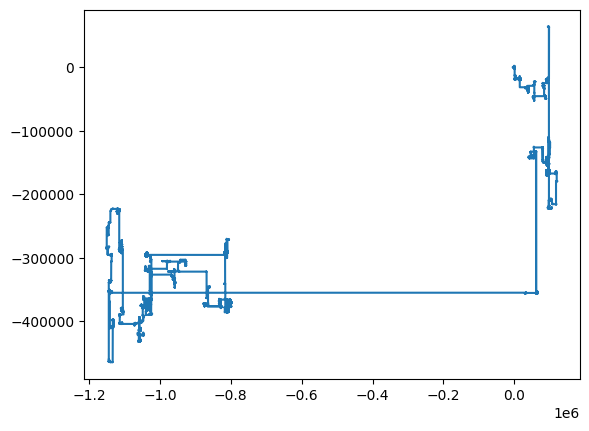

In [12]:
plt.plot(data_first_particle.x,data_first_particle.y)

In [173]:
data_last_vals = pd.read_csv('../result_new/last_vals.csv',sep=' ', index_col=False)

In [174]:
data_last_vals

,x,y
0,3190510.0,-1594750.0
1,4460100.0,19459100.0
2,-1939400.0,-682322.0
3,1650350.0,-7355390.0
4,7269010.0,-3637330.0
...,...,...
149995,-2608940.0,-1095690.0
149996,1742090.0,1160570.0
149997,-9898000.0,3091490.0
149998,22980800.0,3153010.0


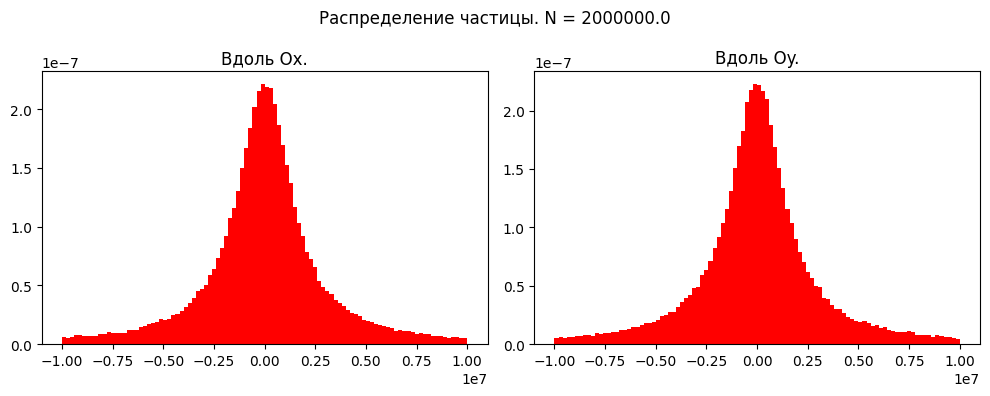

In [175]:
bin_cnt = 100
bin_w = 1/bin_cnt
_idx = 9
plt.figure(figsize=(10, 4))
plt.suptitle(f'Раcпределение частицы. N = {2e6}')

plt.subplot(1,2,1)
plt.hist(data_last_vals.x, bin_cnt, facecolor='r', density=True, label='E(X)', range=(-1e7, 1e7))
plt.title(f'Вдоль Ox.')

plt.subplot(1,2,2)
plt.hist(data_last_vals.y, bin_cnt, facecolor='r', density=True, label='E(X)', range=(-1e7, 1e7))
plt.title(f'Вдоль Oy.')

plt.tight_layout()
plt.show()